# Guiding questions

How many international students are studying in the U.S., and from where?

In [2]:
from bs4 import BeautifulSoup, Tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
domain = 'https://studyinthestates.dhs.gov'
rootPage = requests.get(domain + '/sevis-by-the-numbers/sevis-by-the-numbers-data')
rootPage.raise_for_status()

soup = BeautifulSoup(rootPage.content)

In [4]:
listItems = soup.findAll('div', {'class': 'field-item even'})[0].ul
paths = []
for li in listItems:
    if not isinstance(li, Tag):
        continue
    paths.append(li.a['href'])

In [5]:
def getReport(path):
    title = path.split('/')[-1]
    r = requests.get(domain + path)
    r.raise_for_status()
    df = pd.read_html(r.content)[0]
    
    if 'Country of Citizenship' in df.columns:
        df.set_index('Country of Citizenship', inplace=True)
    else:
        print('Report {} is not in the "correct" format.'.format(title))
    print('Successfully scanned report', title)
    return {
        'dataframe': df,
        'title': title,
    }

In [6]:
reports = []

for path in paths:
    reports.append(getReport(path))

Successfully scanned report april-2014
Successfully scanned report july-2014
Successfully scanned report october-2014
Successfully scanned report february-2015
Successfully scanned report september-2015
Successfully scanned report september-2015-stem-data
Successfully scanned report december-2015
Successfully scanned report december-2015-stem-data
Successfully scanned report march-2016
Successfully scanned report march-2016-stem-data
Successfully scanned report july-2016
Successfully scanned report november-2016
Successfully scanned report november-2016-stem-data
Successfully scanned report march-2017
Successfully scanned report march-2017-stem-data
Successfully scanned report may-2017
Successfully scanned report may-2017-stem-data
Successfully scanned report december-2017
Successfully scanned report december-2017-stem-data
Successfully scanned report march-2018
Successfully scanned report march-2018-stem-data
Successfully scanned report july-2018
Report july-2018-stem-data is not in t

In [7]:
data = []

for report in reports:
    df = report['dataframe']
    country = 'PAKISTAN'
    if country not in df.index:
        continue
    row = df.loc[country]
    try:
        data.append(int(row['# of Active Students']))
    except:
        data.append(df.groupby(['Country of Citizenship']).sum().loc[country].loc['Active Number of Students'])

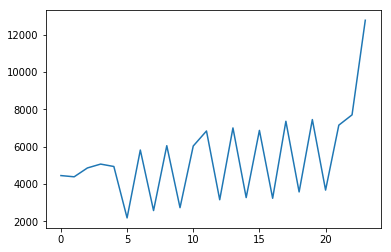

In [8]:
plt.plot(data + [12783])